Bonjour et bienvenue

In [56]:
pip install yfinance --user

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas
import numpy
from matplotlib.pyplot import plot
from matplotlib.pyplot import show
from matplotlib.pyplot import figure

In [2]:
import yfinance as yf

# Récupérer les données historiques sur l'action Tesla
tesla = yf.Ticker('TSLA')
historical_data = tesla.history(period='max')

# Sauvegarder les données dans un fichier CSV
historical_data.to_csv('tesla_stock_prices.csv')


In [4]:
data = pandas.read_csv('TSLA.csv', delimiter=',', decimal='.', parse_dates=['Date'])
data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1572 entries, 0 to 1571
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1572 non-null   datetime64[ns]
 1   Open       1572 non-null   float64       
 2   High       1572 non-null   float64       
 3   Low        1572 non-null   float64       
 4   Close      1572 non-null   float64       
 5   Adj Close  1572 non-null   float64       
 6   Volume     1572 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 86.1 KB


In [5]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-30,23.009333,23.218000,22.811333,23.054667,23.054667,70765500
1,2018-01-31,23.167334,23.746000,23.012667,23.620667,23.620667,93211500
2,2018-02-01,23.400000,23.977333,23.242001,23.283333,23.283333,62965500
3,2018-02-02,23.229334,23.463333,22.700666,22.916668,22.916668,55572000
4,2018-02-05,22.531334,22.964666,22.200001,22.208668,22.208668,66961500


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

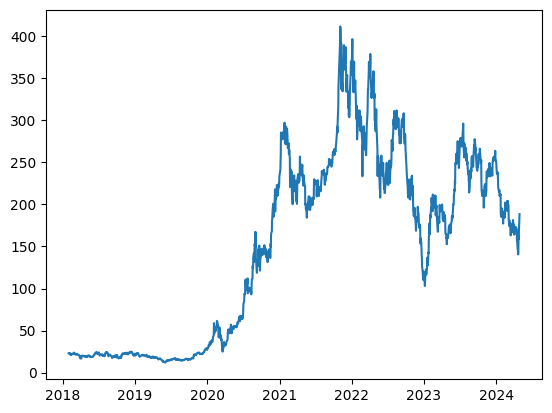

In [7]:
openData = data['Open']
dateData = data['Date']

plot(dateData, openData)
show()

In [8]:
for i in range(180, 360):
    data[f'PreviousClose{i}'] = data['Close'].shift(i)
    data[f'PreviousOpen{i}'] = data['Open'].shift(i)
    data[f'PreviousHigh{i}'] = data['High'].shift(i)
    data[f'PreviousLow{i}'] = data['Low'].shift(i)
    data[f'PreviousVolume{i}'] = data['Volume'].shift(i)
    data[f'PreviousAdj Close{i}'] = data['Adj Close'].shift(i)


/tmp/ipykernel_4217/1752680727.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'PreviousOpen{i}'] = data['Open'].shift(i)
/tmp/ipykernel_4217/1752680727.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'PreviousHigh{i}'] = data['High'].shift(i)
/tmp/ipykernel_4217/1752680727.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-frag

In [9]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,PreviousClose180,PreviousOpen180,PreviousHigh180,...,PreviousHigh358,PreviousLow358,PreviousVolume358,PreviousAdj Close358,PreviousClose359,PreviousOpen359,PreviousHigh359,PreviousLow359,PreviousVolume359,PreviousAdj Close359
0,2018-01-30,23.009333,23.218000,22.811333,23.054667,23.054667,70765500,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-31,23.167334,23.746000,23.012667,23.620667,23.620667,93211500,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-02-01,23.400000,23.977333,23.242001,23.283333,23.283333,62965500,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-02-02,23.229334,23.463333,22.700666,22.916668,22.916668,55572000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-02-05,22.531334,22.964666,22.200001,22.208668,22.208668,66961500,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
data.drop(['High', 'Low', 'Close', 'Volume', 'Adj Close'],axis=1,inplace=True)

In [28]:
#Add new columns for the year, month, day, day of week, and end of year
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['DayOfWeek'] = data['Date'].dt.dayofweek
data['EndOfYear'] = data['Date'].dt.is_year_end

dateData = data['Date']


In [12]:
data.head()

,Date,Open,PreviousClose180,PreviousOpen180,PreviousHigh180,PreviousLow180,PreviousVolume180,PreviousAdj Close180,PreviousClose181,PreviousOpen181,...,PreviousOpen359,PreviousHigh359,PreviousLow359,PreviousVolume359,PreviousAdj Close359,Year,Month,Day,DayOfWeek,EndOfYear
0,2018-01-30,23.009333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2018,1,30,1,False
1,2018-01-31,23.167334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2018,1,31,2,False
2,2018-02-01,23.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2018,2,1,3,False
3,2018-02-02,23.229334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2018,2,2,4,False
4,2018-02-05,22.531334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2018,2,5,0,False


In [29]:
# Diviser les données en fonctionnalités (X) et cible (y)
X = data.drop(columns=['Date', 'Open'])  # Supprimer la colonne de date et la cible

print(X.head())

y = data['Open']  # Utiliser le cours d'ouverture comme cible

print(y.head())

index = int(len(data) * 0.8)

dateData = dateData[index:]

   PreviousClose180  PreviousOpen180  PreviousHigh180  PreviousLow180  \
0               NaN              NaN              NaN             NaN   
1               NaN              NaN              NaN             NaN   
2               NaN              NaN              NaN             NaN   
3               NaN              NaN              NaN             NaN   
4               NaN              NaN              NaN             NaN   

   PreviousVolume180  PreviousAdj Close180  PreviousClose181  PreviousOpen181  \
0                NaN                   NaN               NaN              NaN   
1                NaN                   NaN               NaN              NaN   
2                NaN                   NaN               NaN              NaN   
3                NaN                   NaN               NaN              NaN   
4                NaN                   NaN               NaN              NaN   

   PreviousHigh181  PreviousLow181  ...  PreviousOpen359  PreviousHigh359 

In [21]:


# Diviser les données en ensembles d'entraînement et de test
X_train = X[:index]
X_test = X[index:]
y_train = y[:index]
y_test = y[index:]

# Entraîner un modèle Random Forest avec bootstrapping
model = RandomForestRegressor(n_estimators=100, random_state=42, bootstrap=True)
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
predictions = model.predict(X_test)

# Calculer l'erreur quadratique moyenne (RMSE)
rmse = numpy.sqrt(mean_squared_error(y_test, predictions))
n_rmse= rmse / y_test.mean()
print(f'RMSE: {rmse}')
print(f'Normalized RMSE: {n_rmse}')


RMSE: 46.50749069337948
Normalized RMSE: 0.2169678406822831


In [30]:
print('Predictions shape :' + str(predictions.shape))
print('y_test shape :' + str(y_test.shape))
print('X_test shape :' + str(X_test.shape))
print('dateData shape :' + str(dateData.shape))

Predictions shape :(315,)
y_test shape :(315,)
X_test shape :(315, 1085)
dateData shape :(315,)


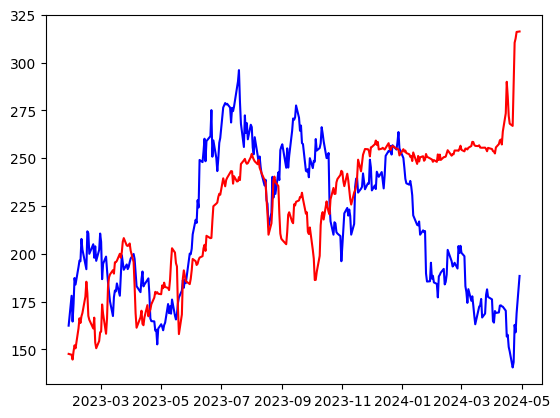

In [32]:
plot(dateData, y_test, 'b-')
plot(dateData, predictions, 'r-')
show()
